# Distributions - Mountains

Guam is a mountainous island, with most of the elevation change occuring in the southern part of the island.

## Data

The USGS released a 1/3 arcsecond Digital Elevation Model (DEM) of the [entire United States](https://catalog.data.gov/dataset/1-3rd-arc-second-digital-elevation-models-dems-usgs-national-map-3dep-downloadable-data-collect), including Guam, for public use. 1/3 arcsecond is equivalent to approximately 10 meters at Guam's altitude and latitude.

A cropped GEOTIFF is located in this folder. The GEOTIFF's pixel value represents that location's height in meters and the image also contains metadata for the latitude and longitude of the DEM.

1
(4623, 3743)
BoundingBox(left=144.614351852, bottom=13.23037037, right=144.960925926, top=13.658425926)
EPSG:4269


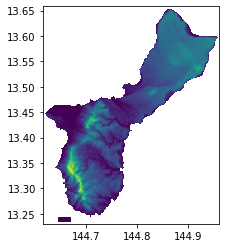

<AxesSubplot:>

In [1]:
import rasterio
from rasterio.plot import show

filename = 'USGS_13_n14e144_20130911_cropped.tif'
img = rasterio.open(filename)

# No. of Bands and Image resolution
print(img.count)
print((img.height, img.width))
print(img.bounds)

# Coordinate Reference System
print(img.crs)

show(img)

## Topography

This plot graphs Guam's latitudinal and longitudinal profile as well as its topography as a color gradient.

Any altitude below 1 meter is shown as white, which allows specific geography around Apra Harbor and Cocos Island.

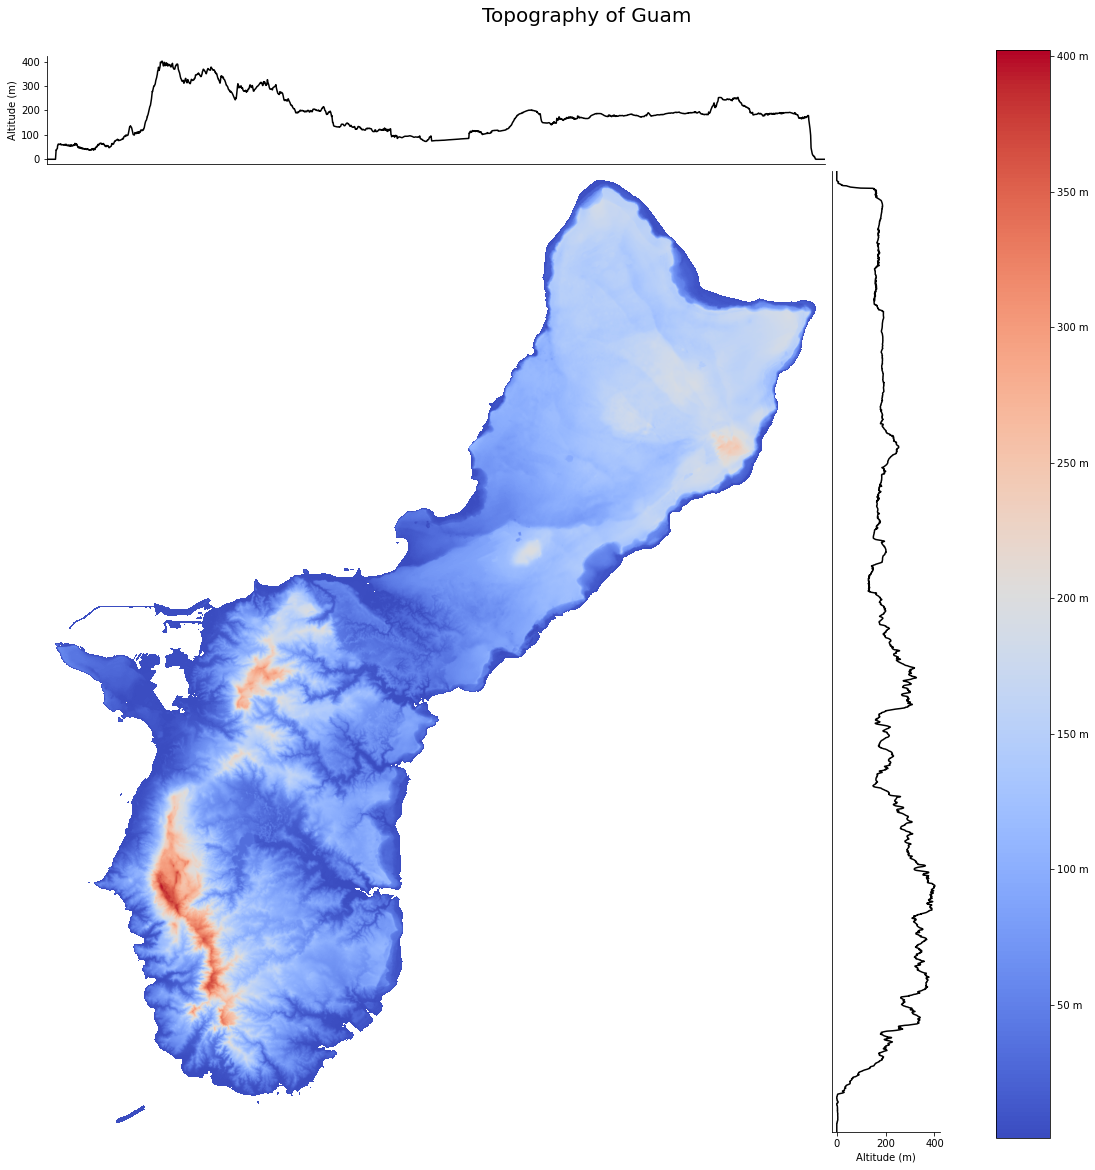

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
%matplotlib inline

dataset = img.read()

figsize = (20, 20)

# setting low value (below 1m) to white
cmap = cm.get_cmap('coolwarm').copy()
cmap.set_under('white')

fig, ax = plt.subplots(figsize=figsize, facecolor='white')

divider = make_axes_locatable(ax)
ax_x = divider.append_axes("top", 1.5, pad=0.1, sharex=ax)
ax_y = divider.append_axes("right", 1.5, pad=0.1, sharey=ax)

ax_x.xaxis.set_tick_params(labelbottom=False)
ax_y.yaxis.set_tick_params(labelleft=False)

c = ax.imshow(dataset[0], cmap=cmap, vmin=1)
fig.colorbar(c, ax=ax, format=lambda x, _: f"{x:.0f} m")

alt = dataset.copy()
alt[alt < 1] = 0
x = np.arange(dataset[0].shape[1])
x_alt = alt[0].max(axis=0)
y = np.arange(dataset[0].shape[0])
y_alt = alt[0].max(axis=1)

# ax_x.scatter(x, x_alt, cmap=cm.Spectral(x_alt), edgecolor='none', vmin=1)
# ax_y.scatter(y_alt, y, cmap=cm.Spectral(y_alt), edgecolor='none', vmin=1)
ax_x.plot(x, x_alt, c='black')
ax_y.plot(y_alt, y, c='black')

ax_x.set_ylabel('Altitude (m)')
ax_y.set_xlabel('Altitude (m)')


# removing common and unwanted axis and spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax_x.spines['right'].set_visible(False)
ax_x.spines['top'].set_visible(False)
ax_x.xaxis.set_visible(False)
ax_y.spines['right'].set_visible(False)
ax_y.spines['top'].set_visible(False)
ax_y.yaxis.set_visible(False)

plt.suptitle("Topography of Guam",
             y=.91,
             fontsize=20)
plt.show()

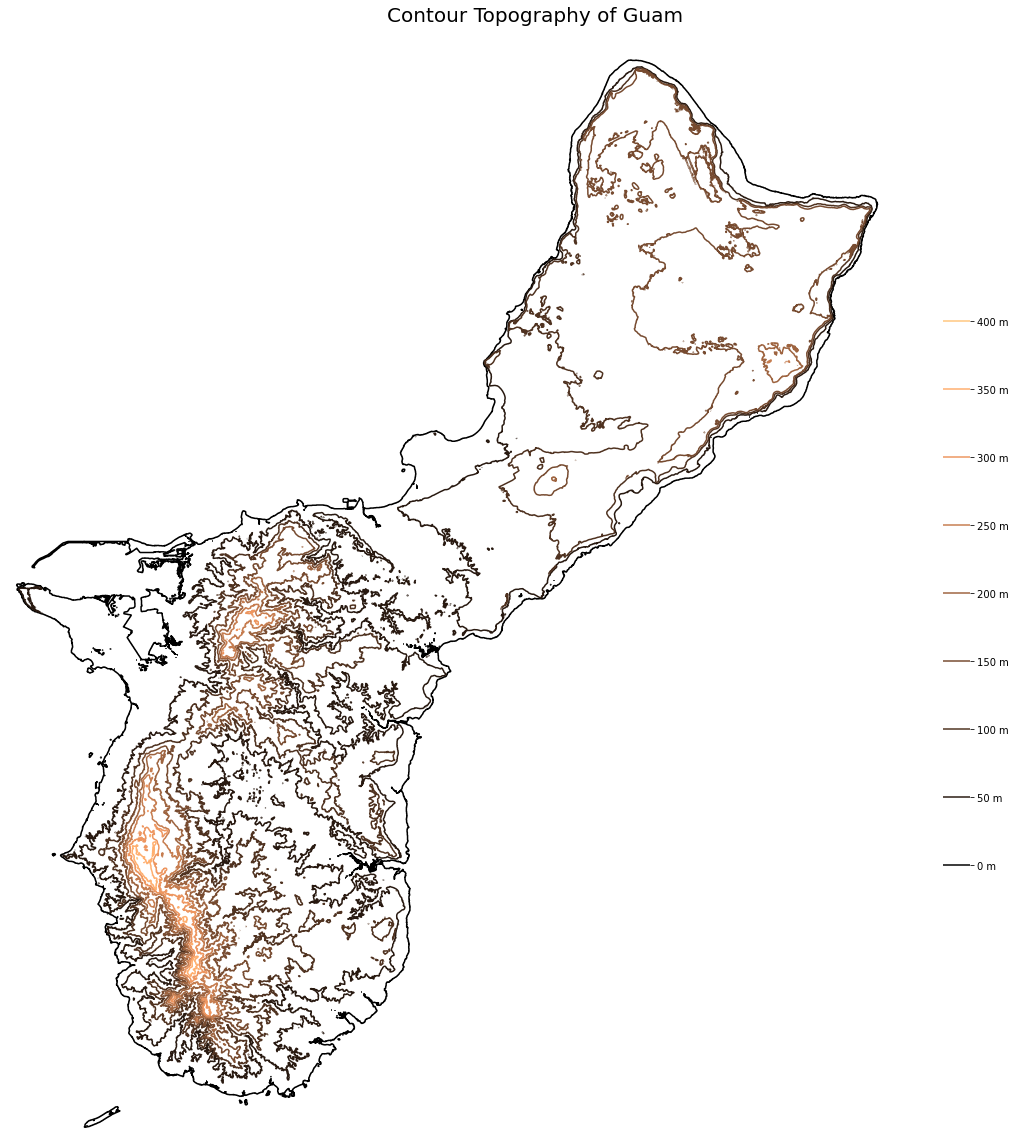

In [44]:
fig, ax = plt.subplots(figsize=(20,20), facecolor='white')

levels = range(0, int(dataset[0].max()), 50)
c = ax.contour(alt[0], cmap='copper', levels=levels)

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar(c, ax=ax, format=lambda x, _: f"{x:.0f} m", shrink=0.5)
cb.outline.set_visible(False)

# removing common and unwanted axis and spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.suptitle("Contour Topography of Guam",
             y=.91,
             fontsize=20)

plt.show()

## Slope

Slope is the rate of change of altitude. Taking the discrete difference across X and Y axis, then using Pythagorean's theorem to get the total slope across X and Y. It is then divided by 10 to compensate for the resolution of the DEM pixels, which is 10m per pixel.

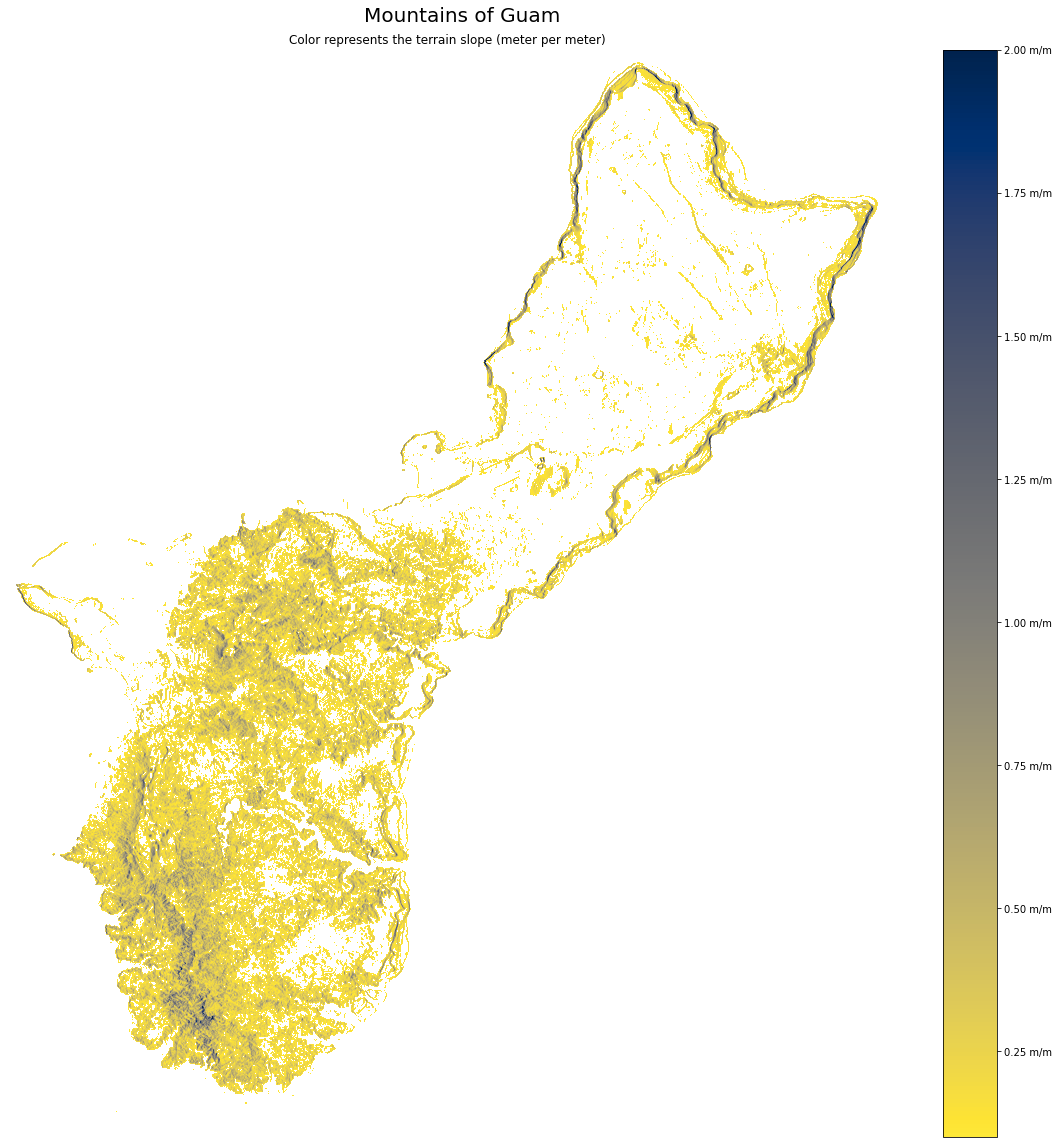

In [89]:
n = 1
x_diff = np.diff(alt[0], axis=1, n=n)
y_diff = np.diff(alt[0], axis=1, n=n)
diff = np.sqrt(np.power(x_diff, 2) + np.power(y_diff, 2)) / 10  # 1/3 arcsecond is 10m per pixel

cmap = cm.get_cmap('cividis_r').copy()
cmap.set_under('white')
fig, ax = plt.subplots(figsize=(20,20), facecolor='white')
c = ax.imshow(diff, cmap=cmap, vmin=0.1, vmax=2)
fig.colorbar(c, ax=ax, format=lambda x, _: f"{x:.2f} m/m",)

# removing common and unwanted axis and spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

mid = (fig.subplotpars.right + fig.subplotpars.left)/2
plt.suptitle("Mountains of Guam",
             y=.91,
             x=.45,
             fontsize=20)
plt.title("Color represents the terrain slope (meter per meter)",
          x=.5)

plt.show()